## Plot comparisons of total column ozone for specific months

Plotting September 2002 over the south pole.

In [1]:
# need to import cfplot before cf due to issues with matplotlib and esmpy
import cfplot as cfp
import cf

In [2]:
# define the locations of the various datasets
# CCMI2022 refD1 ensemble
ensdata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_Amon_UKESM1-StratTrop_refD1_r*i1p1f2_gn_19600101-20190101.nc'
# CCMI1 refC1
ccmidata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_monthly_UMUKCA-UCAM_refC1_r1i1p1_*.nc'
# UKCA model data from ACSIS project, nudged to ERA5
ukcadata='/home/ubuntu/Tutorials/UMvn13.0/data/u-*/apm.pp/*.pp'
# Bodeker Scientific TCO dataset - https://www.bodekerscientific.com/data/total-column-ozone
# this has been preprocessed into a single file using ncks, ncatted, and ncrcat
# for i in `ls *.nc`; do echo $i; ncks -O --mk_rec_dmn time $i $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a created,global,d,, $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,longitude,o,c,degrees_east $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,latitude,o,c,degrees_north $i; done
# ncrcat BSFilledTCO_V3.4.1_????_Monthly.nc ../BSFilledTCO_V3.4.1_Monthly.nc
obsdata='/home/ubuntu/Tutorials/UMvn13.0/data/Bodeker_3.4.1/*.nc'
# We would like to thank Bodeker Scientific, funded by the New Zealand Deep South National 
# Science Challenge, for providing the combined NIWA-BS total column ozone database.

In [3]:
# pp-files for UKCA, individual files
inukca=cf.read(ukcadata,select='stash_code=50219')[0]

# Bodeker Total Column Ozone dataset - **preprocessed**
inobs=cf.read(obsdata, select='equivalent_thickness_at_stp_of_atmosphere_ozone_content')[0]

In [4]:
# time constraint for loading
imonth=9
iyear=2002

# need to make a list of month names for the plot title - note that python indexing starts at 0
month_names=['January','February','March','April','May','June','July','August','September','October','November','December']

In [5]:
# ukca data
ukca = inukca.subspace(T=cf.wi(cf.dt(str(iyear)+'-'+str(imonth)+'-01'),cf.dt(str(iyear)+'-'+str(imonth+1)+'-01'))).squeeze()

# obs data
obs = inobs.subspace(T=cf.wi(cf.dt(str(iyear)+'-'+str(imonth)+'-01'),cf.dt(str(iyear)+'-'+str(imonth+1)+'-01'))).squeeze()

In [6]:
# set the levels to use
cfp.levs(min=200, max=450, step=25)

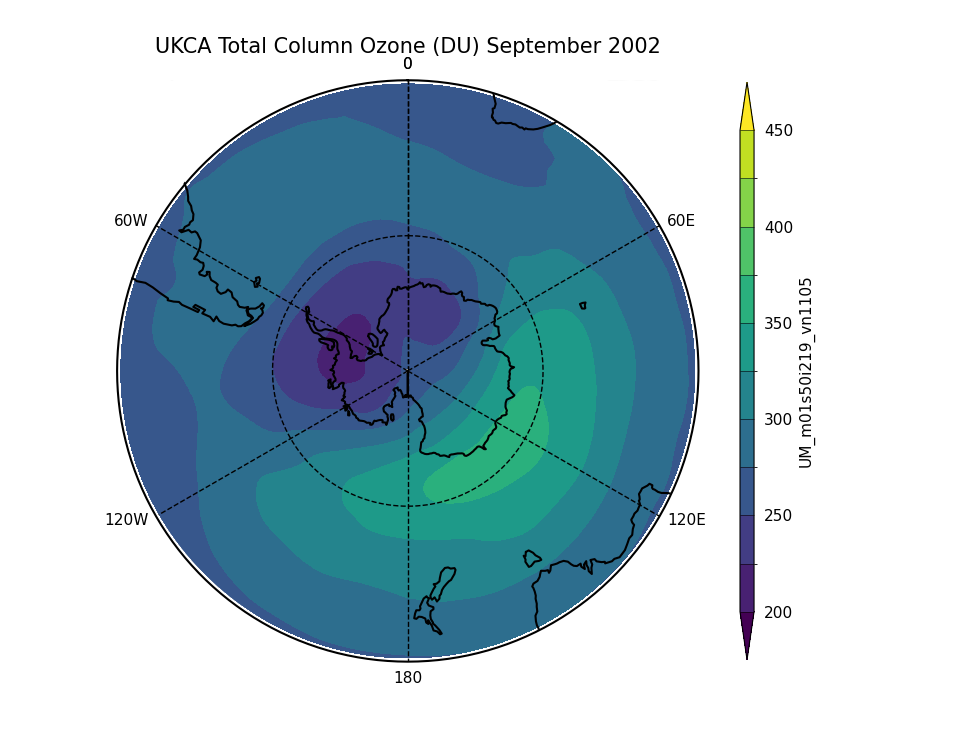

In [7]:
cfp.gopen()
cfp.mapset(proj='spstere', boundinglat=-30, lon_0=0)
cfp.con(ukca, lines=False, title='UKCA Total Column Ozone (DU) '+month_names[imonth-1]+' '+str(iyear))
cfp.gclose()

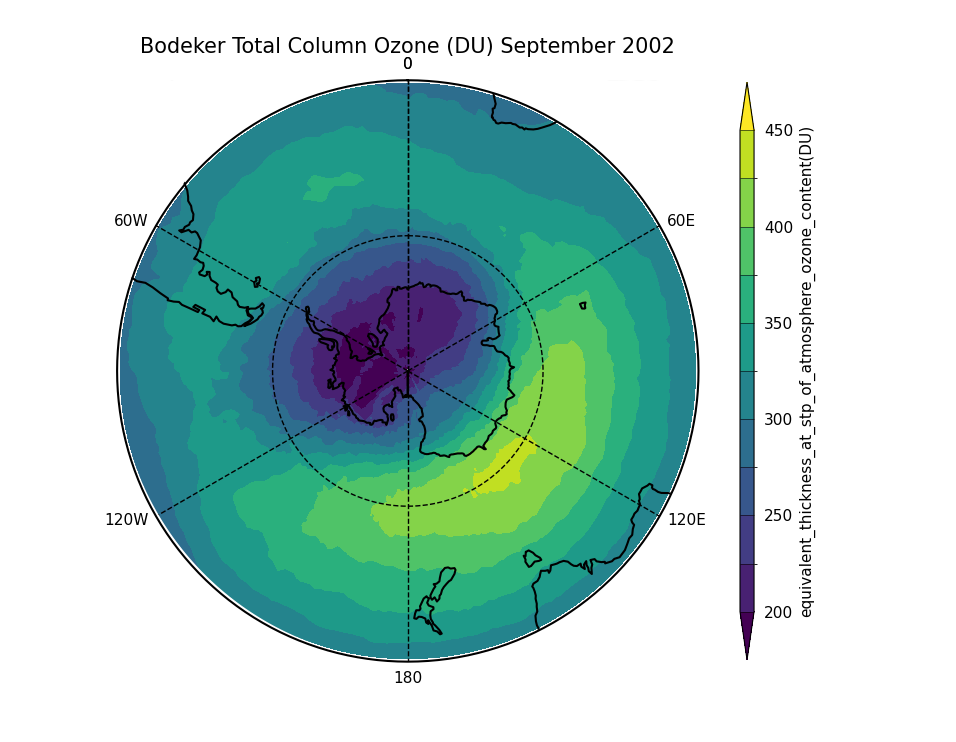

In [8]:
cfp.mapset(proj='spstere', boundinglat=-30, lon_0=0)
cfp.con(obs, lines=False, title='Bodeker Total Column Ozone (DU) '+month_names[imonth-1]+' '+str(iyear))

In [9]:
# regrid the UKCA to the Bodeker grid to allow for differencing
ukca_regrid=ukca.regrids(obs, 'linear')

In [10]:
# calculate differences
# absolute
diff_abs=ukca_regrid.copy()
diff_abs.data=ukca_regrid.data - obs.data
# percentage
diff_pc=ukca_regrid.copy()
diff_pc.data=100.0*((ukca_regrid.data - obs.data)/ukca_regrid.data)

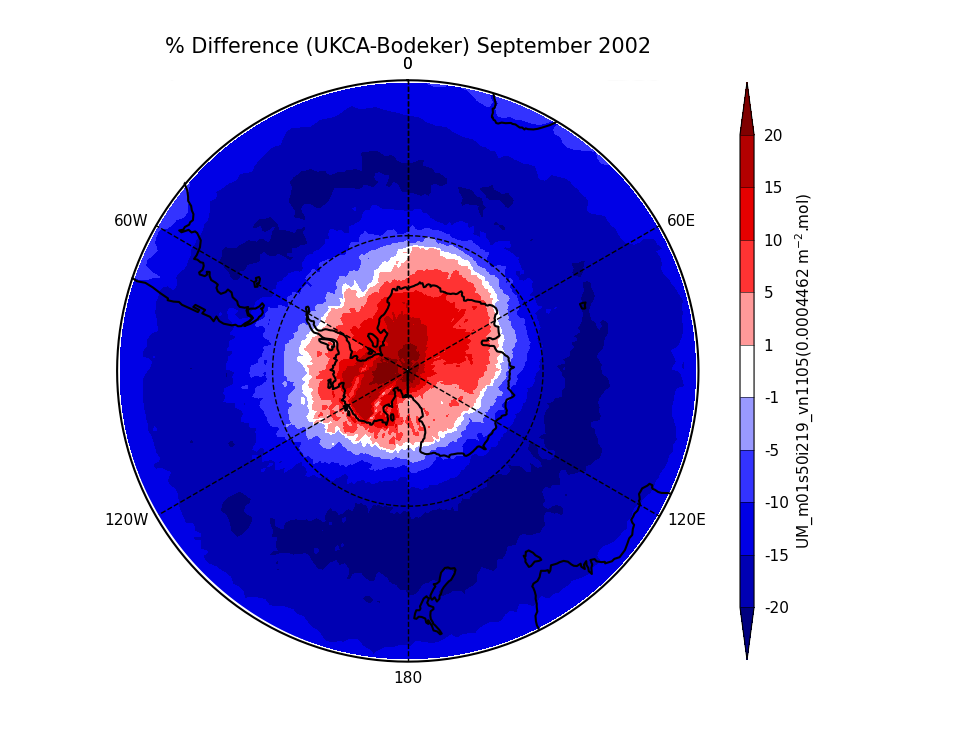

In [11]:
# set the levels to use
cfp.levs(manual=[-20,-15,-10,-5,-1,1,5,10,15,20])
# use bwr
cfp.cscale(scale='BlWhRe')
cfp.mapset(proj='spstere', boundinglat=-30, lon_0=0)
cfp.con(diff_pc, lines=False, title='% Difference (UKCA-Bodeker) '+month_names[imonth-1]+' '+str(iyear))

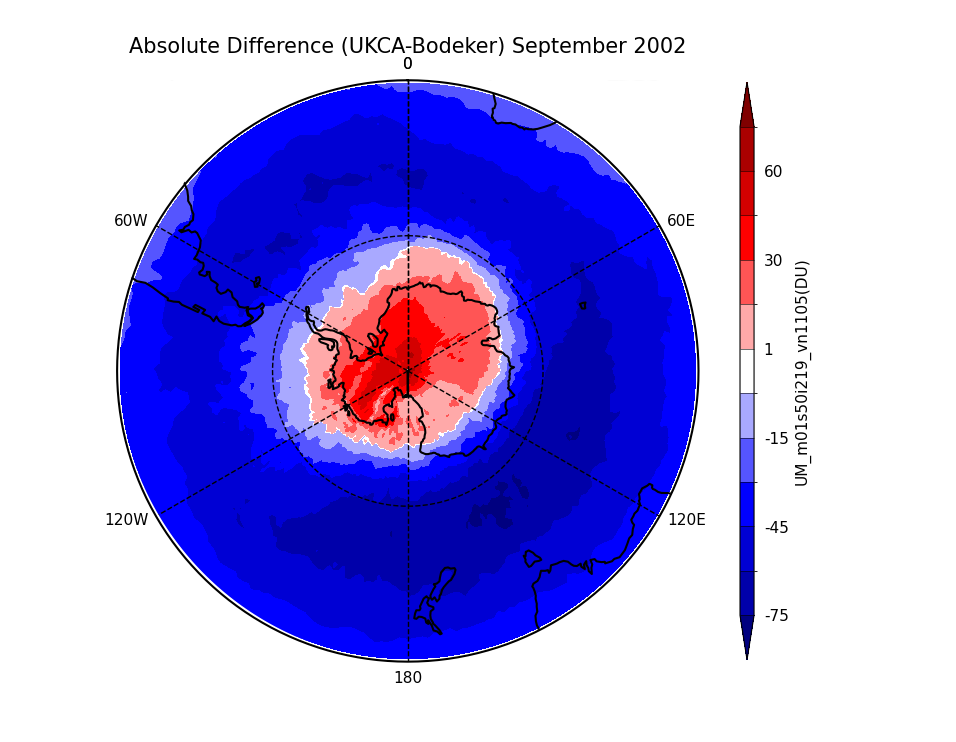

In [12]:
# set the levels to use
cfp.levs(manual=[-75,-60,-45,-30,-15,-1,1,15,30,45,60,75])
# use bwr
cfp.cscale(scale='BlWhRe')
cfp.mapset(proj='spstere', boundinglat=-30, lon_0=0)
cfp.con(diff_abs, lines=False, title='Absolute Difference (UKCA-Bodeker) '+month_names[imonth-1]+' '+str(iyear))